In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
data = pd.read_csv("/Users/isabelmartinez/Documents/Projects/Berkeley Climate/GlobalLandTemperaturesByCity.csv")

## Basic Exploration on the Dataset

In [3]:
# Explore the Basic Structure of the Data Frame

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [305]:
# Basic Statistics

data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [306]:
# Rows & Columns 

data.shape

(8599212, 7)

In [307]:
# Columns

data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [308]:
# Checking for unique & null values 

data.nunique()


dt                                 3239
AverageTemperature               105644
AverageTemperatureUncertainty     10902
City                               3448
Country                             159
Latitude                             73
Longitude                          1227
dtype: int64

In [309]:
data.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [4]:
# Drop null values

data = data.dropna(how='any' ,axis=0)
data.shape

(8235082, 7)

In [5]:
# Convert date & set index

data['Date'] = pd.to_datetime(data['dt'])

data.set_index('Date',inplace = True)



In [312]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
# Create a Year variable 

data['Year'] = data.index.year

In [314]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
Date,,,,,,,,
1743-11-01,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1744-04-01,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
1744-05-01,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
1744-06-01,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
1744-07-01,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744


## Time Series Analysis


In [7]:
# For this analysis, I'll focus on the city of Munich, Germany
# Munich is the 3rd and 11th largest city in Germany and the EU, respectively

munich = data.loc[data['City'] == ('Munich'), ['dt','AverageTemperature']]

In [8]:
# To build the climate model, I'll take two key variables: data and temperature

munich.columns = ['Date', 'Temperature']

In [9]:
munich.head()

,Date,Temperature
Date,,
1743-11-01,1743-11-01,1.323
1744-04-01,1744-04-01,5.498
1744-05-01,1744-05-01,7.918
1744-06-01,1744-06-01,11.070
1744-07-01,1744-07-01,12.935


/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Temperature in C')

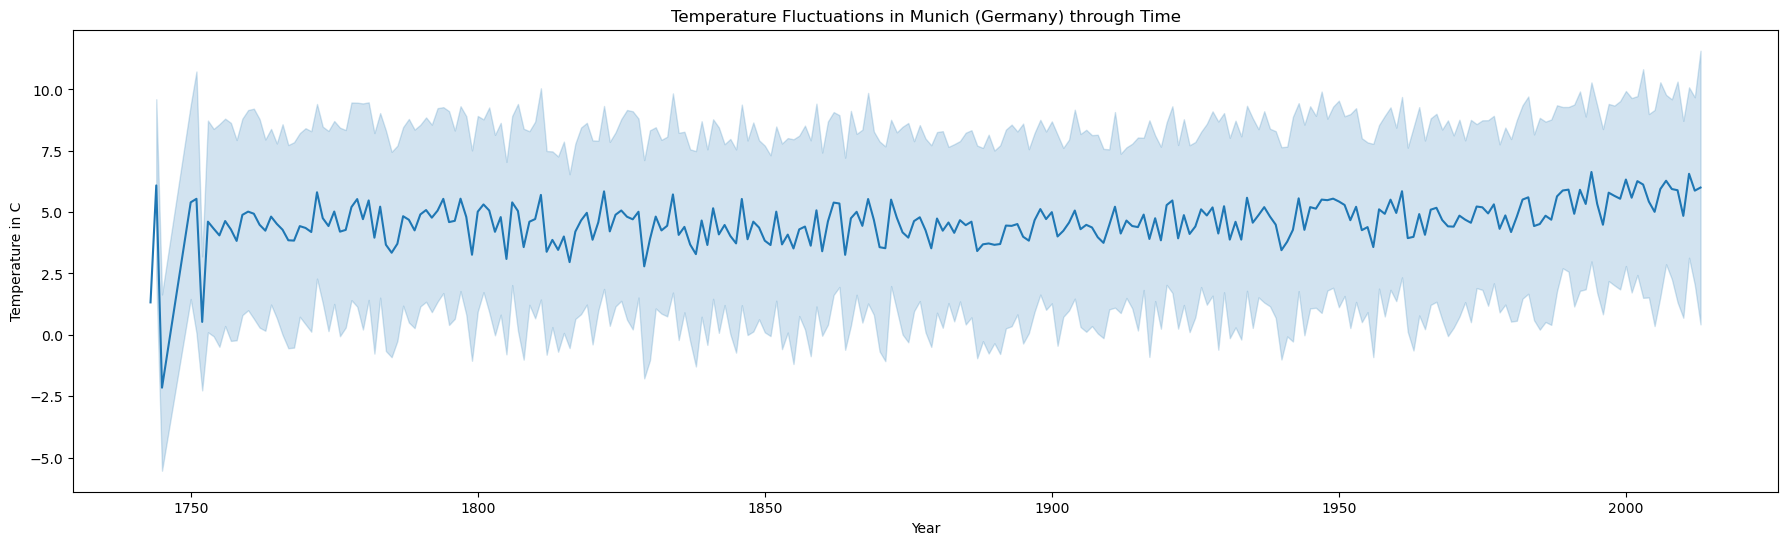

In [10]:
plt.figure (figsize = (22,6))
sns.lineplot( x = munich.index.year, y = munich['Temperature'])
plt.title('Temperature Fluctuations in Munich (Germany) through Time')
plt.xlabel('Year')
plt.ylabel('Temperature in C')

In [11]:
# As done before, I'll split the date variable into year and month for ease of analysis

munich['Year'] = munich.index.year
munich['Month'] = munich.index.month

In [15]:
# As shown in the plot above, there appears to be significant fluctiation and missing values in the years preceeding 
# 1760
# Using the newly created Year variable, I'll focus on the period of time beyond 1760

munich = munich[munich['Year'] >= 1760]


In [16]:
# To be able to generate a plot representation of temperatures by year and month, 
# I make use of pandas' pivot function

pivot = pd.pivot_table(munich, index = 'Month', columns = 'Year', values = 'Temperature', aggfunc= 'mean')

In [17]:
pivot.head()

Year,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month,,,,,,,,,,,,,,,,,,,,,
1,-5.663,-6.390,-3.286,-8.545,-2.517,-1.809,-8.847,-11.384,-8.413,-3.475,...,-4.448,-4.343,-6.392,-0.093,-1.091,-5.665,-6.259,-3.576,-3.040,-3.402
2,-4.606,-1.610,-3.692,-0.837,-0.720,-5.572,-5.343,-1.449,-4.852,-3.770,...,-2.183,-6.313,-4.136,0.666,-0.056,-3.937,-3.505,-1.326,-7.550,-5.357
3,-1.478,1.923,-2.920,-1.233,-1.464,1.341,-0.065,-0.151,-1.792,-0.868,...,0.239,0.569,-1.351,2.046,0.464,-0.030,0.446,2.635,3.746,-0.946
4,5.884,3.518,6.733,3.750,3.195,4.518,5.298,2.463,4.183,4.431,...,5.343,5.439,5.027,9.155,4.071,7.666,5.551,8.118,5.250,5.521
5,9.443,10.692,10.441,7.602,10.956,8.184,9.695,7.744,9.003,8.800,...,7.934,10.098,9.761,11.114,11.353,11.784,8.214,11.312,10.760,8.179


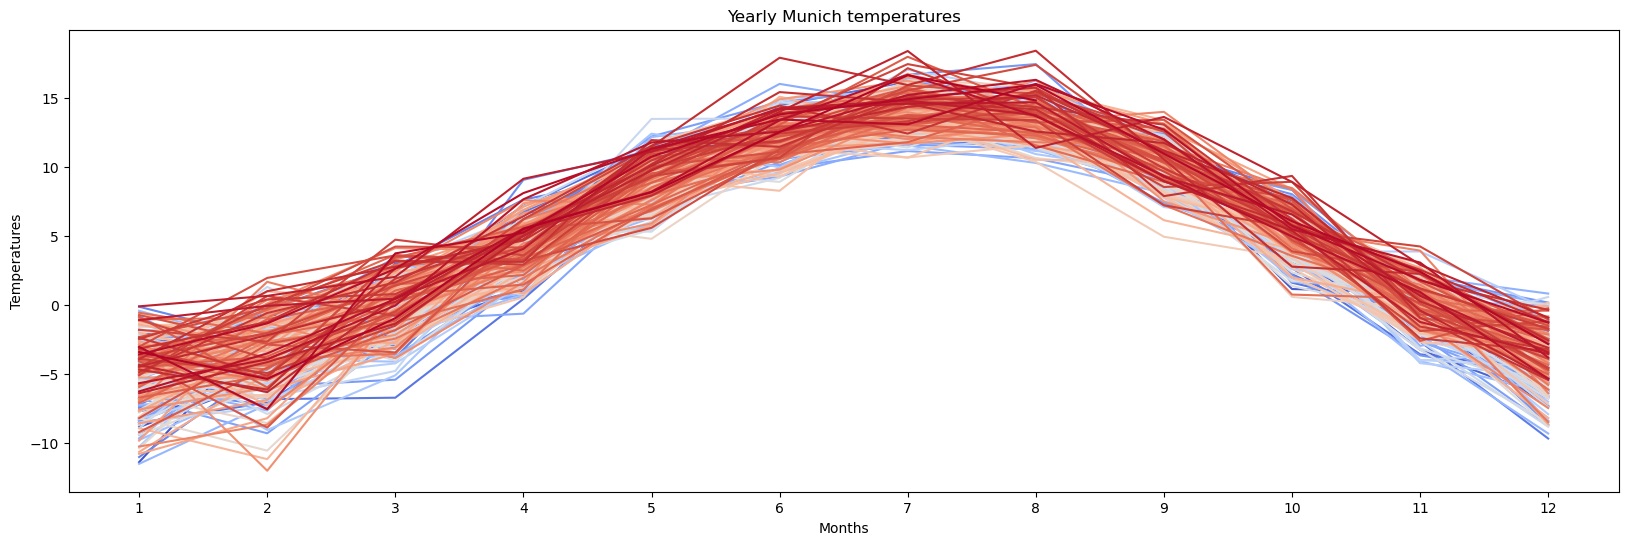

In [18]:
pivot.plot(figsize=(20,6),colormap="coolwarm")
plt.title('Yearly Munich temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')

plt.xticks([x for x in range(1,13)]) ## for each x in range 1 - 13, include x 
plt.legend().remove()
plt.show()

## ARIMA

ARIMA is an acronym for “autoregressive integrated moving average.” It’s a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series. 

An ARIMA model has three component functions: AR (p), the number of lag observations or autoregressive terms in the model; I (d), the difference in the nonseasonal observations; and MA (q), the size of the moving average window. An ARIMA model order is depicted as (p,d,q) with values for the order or number of times the function occurs in running the model. Values of zero are acceptable.

In [27]:
# For the ARIMA Model, I'll once more focus the analysis on the two main variables: date and temperature

munich_final = munich[['Date','Temperature']]

In [28]:
# We can now perform the pertinent changes to our variables

munich_final['Date']= pd.to_datetime(munich_final['Date'])
munich_final['Temperature'] = munich_final['Temperature'].astype(int)


/var/folders/b2/zhcn3t4j7fj4kts8np6676480000gn/T/ipykernel_25557/3643924112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munich_final['Date']= pd.to_datetime(munich_final['Date'])
/var/folders/b2/zhcn3t4j7fj4kts8np6676480000gn/T/ipykernel_25557/3643924112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munich_final['Temperature'] = munich_final['Temperature'].astype(int)


In [29]:
munich_final.dtypes

Date           datetime64[ns]
Temperature             int64
dtype: object

In [30]:
## The first question that needs to be answered (and what would determine the parameter d in the model)
## is whether the series is stationary

from statsmodels.tsa.stattools import adfuller


In [31]:
# Apply ADF test to the 'Temperature' column
adf_result = adfuller(munich_final['Temperature'].dropna()) 

stationarity_interpretation = "Stationary" if adf_result[1] < 0.05 else "Non-Stationary"

print(f"ADF Statistic after differencing: {adf_result[0]}")
print(f"p-value after differencing: {adf_result[1]}")
print(f"Interpretation: The series is {stationarity_interpretation}.")

ADF Statistic after differencing: -7.210425527655471
p-value after differencing: 2.2423423209559773e-10
Interpretation: The series is Stationary.


In [ ]:
## Since the series is stationary, our parameter d = 0

In [ ]:
## To find the rest of the parameters needed (p,q) we need to plot ACF and PACF 

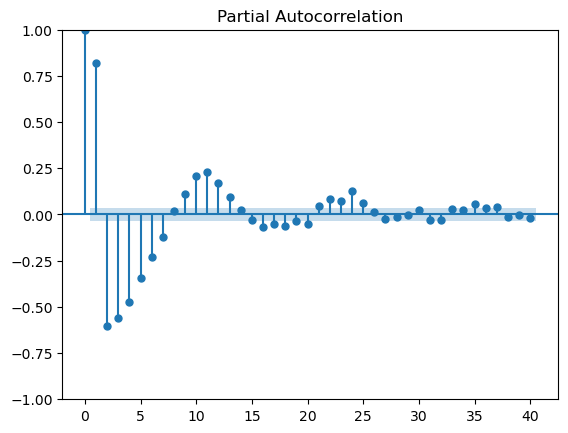

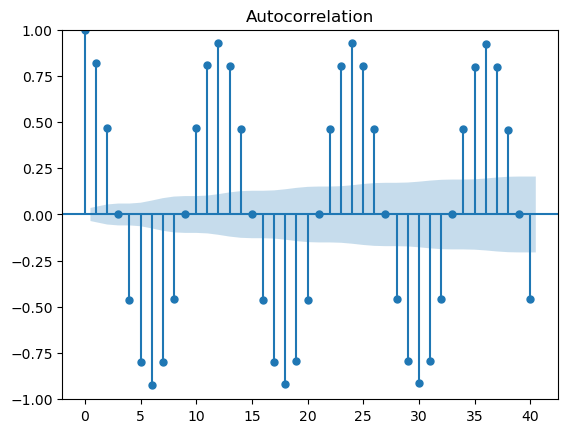

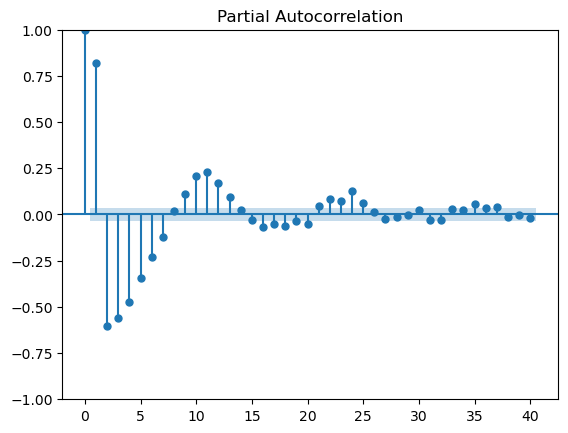

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


plot_acf(munich_final["Temperature"], lags=40)
plot_pacf(munich_final["Temperature"], lags=40)

In [ ]:
## ACF:
### Autoregressive Function specifies the correlation between the error term in the current period and 
### its value x lags before.
### When we set q, we’re specifying how many past error terms 
### (lags of the forecast errors) the model should consider when predicting the next value.
## Because we see a sharp decrease after lag 3, we will choose q = 3

## PACF: 
### Partial Autocorrelation Fuction specifies the correlation between the variable of interest in the present and
### its value x lags before. 
### The value that we choose will represent p.
## Because we see a sharp decrease after lag 2, we will choose p = 2

## Our ARIMA Model has the parameters (p,d,q) = (2,1,3)

## Splitting the data

In [34]:
# For the purporses on this forecasting analysis, we can split the data in
# testing and training sets. In this case, I'll take 80% of the data for training 

train_size = int(len(munich_final) * 0.8)

train, test = munich_final[:train_size], munich_final[train_size:]


## Fitting the ARIMA Model

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
model = ARIMA(train['Temperature'], order = (2,1,3))
model_fit = model.fit()
print(model_fit.summary())

### model = ARIMA(train['Temperature'], order = (2,1,3))
# Parameters (p, d, q):
## p (Autoregressive Order): This is the number of previous values (lags) 
# that the model should consider when making predictions. 
# In this example, p = 2, so the model will look at the last 2 temperature values to predict the next one.

## d (Differencing Order): This is the number of times to difference the data to make it stationary 
# (removing trends). Here, d = 1 means the data will be differenced once, which helps stabilize it.

## q (Moving Average Order): This is the number of previous error terms (from the residuals) 
# the model uses to improve its predictions. Here, q = 3 means the model will use the last 3 error terms.


/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                 2435
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -4824.681
Date:                Wed, 06 Nov 2024   AIC                           9661.362
Time:                        14:41:12   BIC                           9696.145
Sample:                    01-01-1760   HQIC                          9674.007
                         - 11-01-1962                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7320   2.77e-05   6.25e+04      0.000       1.732       1.732
ar.L2         -1.0000   5.55e-06   -1.8e+05      0.000      -1.000      -1.000
ma.L1         -2.7262      1.333     -2.045      0.0

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


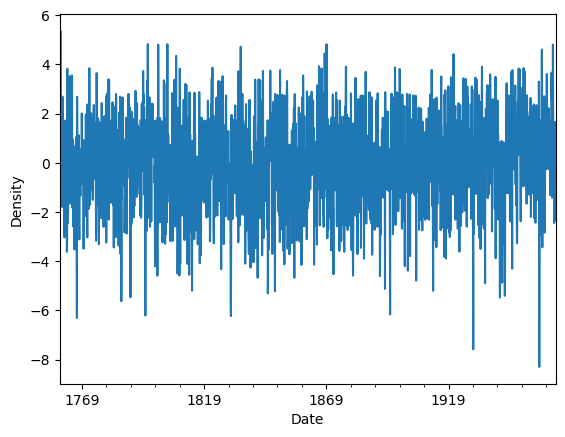

In [37]:
## Let's check the residual plot

# plot residual errors
residuals = model_fit.resid
residuals.plot()
residuals.plot(kind='kde')
plt.show()

## How do you determine whether the residuals are random in regression analysis?
# Just check that they are randomly scattered around zero for the entire range of fitted values. 
# When the residuals center on zero, they indicate that the model’s predictions are correct on average 
# rather than systematically too high or low. 
## Residual = Actual Value − Predicted Value
#The y-axis labeled "Density" refers to the value of the residuals. This is the magnitude of the errors for each point in time.
# Example: positive values on this axis mean the model under-predicted (the actual value was higher than predicted).


## Forecasting

In [39]:
forecast = model_fit.forecast(steps=len(test))

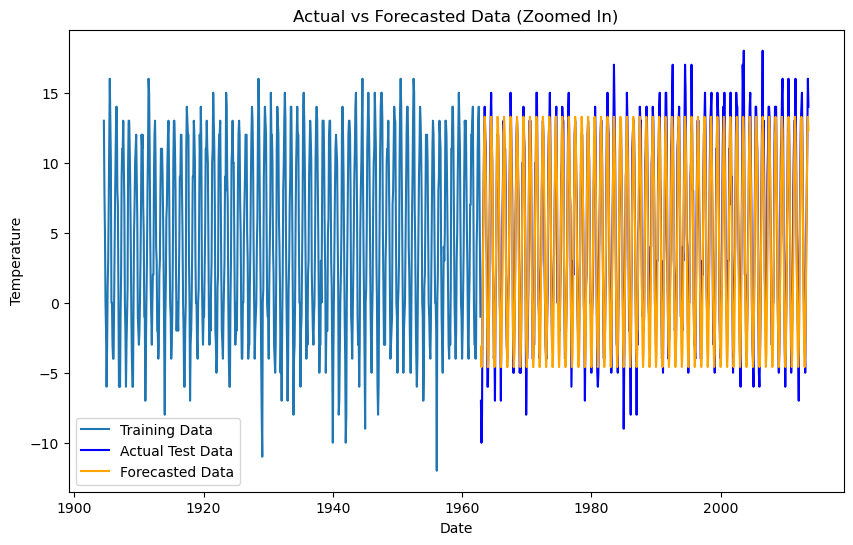

In [40]:
# Plotting

import matplotlib.pyplot as plt

# Adjust the number of training points to display for clarity (e.g., last 100 data points)
plt.figure(figsize=(10, 6))

# Plot last section of training data for better comparison
plt.plot(train.index[-700:], train['Temperature'][-700:], label='Training Data')  # Only last 100 points

# Plot actual test data
plt.plot(test.index, test['Temperature'], label='Actual Test Data', color='blue')

# Plot forecasted data
plt.plot(test.index, forecast, label='Forecasted Data', color='orange')

# Adding titles and labels
plt.title('Actual vs Forecasted Data (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


## Evaluate model's fit

In [41]:
# Evaluate model performance on the test set
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Temperature'], forecast))
print(f"RMSE: {rmse}")

RMSE: 1.87051737009585
